<a href="https://colab.research.google.com/github/Manikanta-Korrapati/Machine-Learning-Projects/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diabetics Prediction Using Logistic Regression**

---



# **Objective**

The objective of this project is to develop a robust logistic regression model capable of accurately predicting the likelihood of diabetes in individuals based on relevant health data. By analyzing features such as glucose levels, blood pressure, BMI, age, and other pertinent factors, the model aims to assist healthcare professionals in early identification and intervention for individuals at risk of developing diabetes. Through rigorous data analysis, feature engineering, and model optimization techniques, the goal is to create a reliable tool that enhances diagnostic capabilities and supports proactive healthcare management strategies for diabetes prevention and control. Ultimately, the project aims to contribute to improved patient outcomes and healthcare resource allocation by leveraging machine learning techniques for diabetes risk assessment.







# **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Import Data**

In [ ]:
db = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Diabetes.csv')

# **Describe Data**

In [ ]:
db.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
db.columns

Index(['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age', 'diabetes'],
      dtype='object')

In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
db.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# **Data Visualization**

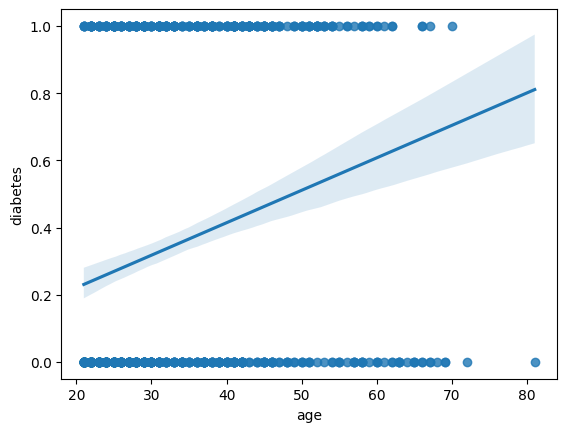

In [ ]:
sns.regplot(x='age',y='diabetes',data=db);

# **Define Target Variable (y) and Feature Variables (X)**

In [ ]:
y=db['diabetes']
x=db[['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age']]

In [ ]:
x.columns

Index(['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age'],
      dtype='object')

In [ ]:
x.shape

(768, 8)

In [ ]:
y.shape

(768,)

# **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2529)

In [ ]:
x_train

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
718,1,108,60,46,178,35.5,0.415,24
34,10,122,78,31,0,27.6,0.512,45
82,7,83,78,26,71,29.3,0.767,36
279,2,108,62,10,278,25.3,0.881,22
646,1,167,74,17,144,23.4,0.447,33
...,...,...,...,...,...,...,...,...
584,8,124,76,24,600,28.7,0.687,52
740,11,120,80,37,150,42.3,0.785,48
399,3,193,70,31,0,34.9,0.241,25
562,1,87,68,34,77,37.6,0.401,24


In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((576, 8), (192, 8), (576,), (192,))

In [ ]:
x_train,x_test,y_train,y_test

(     pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age
 718            1      108         60       46      178  35.5  0.415   24
 34            10      122         78       31        0  27.6  0.512   45
 82             7       83         78       26       71  29.3  0.767   36
 279            2      108         62       10      278  25.3  0.881   22
 646            1      167         74       17      144  23.4  0.447   33
 ..           ...      ...        ...      ...      ...   ...    ...  ...
 584            8      124         76       24      600  28.7  0.687   52
 740           11      120         80       37      150  42.3  0.785   48
 399            3      193         70       31        0  34.9  0.241   25
 562            1       87         68       34       77  37.6  0.401   24
 352            3       61         82       28        0  34.4  0.243   46
 
 [576 rows x 8 columns],
      pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age
 513       

# **Modeling**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
mad =LogisticRegression(max_iter=800)

In [ ]:
mad.fit(x_train,y_train)

LogisticRegression(max_iter=800)

In [ ]:
mad.coef_

array([[ 1.03970514e-01,  3.60029168e-02, -2.05052109e-02,
        -2.05049684e-03,  1.77862901e-04,  8.58797145e-02,
         9.55475356e-01,  2.45882609e-02]])

In [ ]:
mad.intercept_

array([-8.10028949])

# **Prediction**

In [ ]:
y_pred =mad.predict(x_test)

In [ ]:
y_pred

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

# **Model Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.7760416666666666

# **Data Visualization of Actual vs Predicted Data**

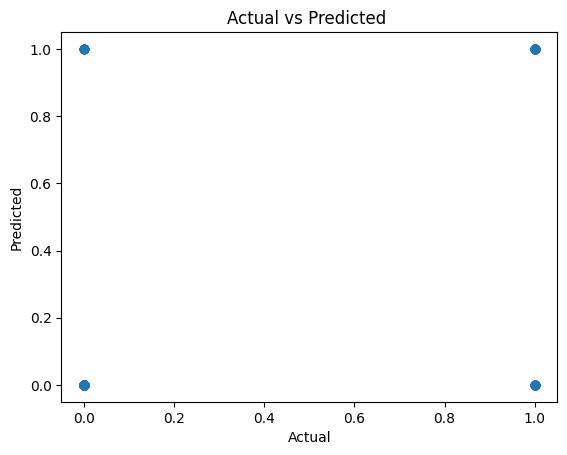

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted ")
plt.show()

# **Future Predictions**

In [ ]:
x_new=db.sample(1)

In [ ]:
x_new

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
44,7,159,64,0,0,27.4,0.294,40,0


In [ ]:
x_latest=x_new.drop('diabetes',axis=1)

In [ ]:
x_latest

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
44,7,159,64,0,0,27.4,0.294,40


In [ ]:
y_latest=mad.predict(x_latest)

In [ ]:
y_latest

array([1])

# **Explaination**

Here in this project,I made a Machine Learning model with the help of Logistic Regression Algorithm, that predict the diabetes of  a person from the data that consists of details like 'pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi','dpf', 'age', 'diabetes'.

Steps that are followed:

1.Import Library: Importing multiple python libraries that are required for this project.

2.Import and Describing Data: Importing the data set with the help pandas library and and describing it's content like shape,columns etc.

3.Data Visualization: Visualizing the data in the form of scatter plot for better understanding.


4.Define Target Variable (y) and Feature Variables (X): Defining the value that need to be predicted as y and the data used to predit as x.

5.Train Test Split: Splitting the data into two segment such as train,test in order to train machine learning model and test it.

6.Modeling: Selecting the model and training it with train data in order to predict the output.

7.Prediction: Predicting the output from test data with the help of trained model.

8.Model Evaluation: Evaluating the accuracy of the trained model with mean accuracy score.

9.Data Visualization of Actual vs Predicted Data: Visualizing the actual and predicted data of the model in the form scatter plot.

10.Future Predictions: Making the model to predict diabetes from new data that is creating in the form of trained data.

By following these steps ,I have created a machine learning model that helps to predict the diabetes in a person using  Machine Learning: Logistic Regression.

